# Artificial Neural Networks
## (Book: Artificial Intelligence with Python)

In [1]:
# !pip install neurolab

## Building a Perceptron based classifier

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

In [3]:
text = np.loadtxt("data_perceptron.txt")

In [4]:
data = text[:, :2]
labels = text[:, 2].reshape((text.shape[0], 1))

In [5]:
data

array([[0.38, 0.19],
       [0.17, 0.31],
       [0.29, 0.54],
       [0.89, 0.55],
       [0.78, 0.36]])

In [6]:
labels

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.]])

Text(0.5, 1.0, 'Input Data')

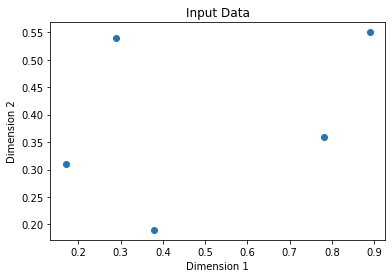

In [7]:
plt.figure()
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Input Data")

In [8]:
# Define minimum and maximum values for each dimensioon
dim1_min, dim1_max, dim2_min, dim2_max = 0, 1, 0, 1

In [9]:
# Number of neurons in the output layer
num_output = labels.shape[1]

In [10]:
# Define a perceptron with 2 input neurons (because we
# have 2 dimensions in the input data)
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
perceptron = nl.net.newp([dim1, dim2], num_output)

In [11]:
# Train the perceptron using the data
error_progress = perceptron.train(data, labels, epochs=100, show=20,
                                  lr=0.03)

The goal of learning is reached


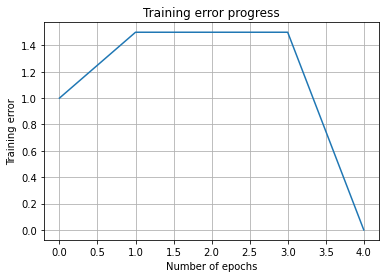

In [12]:
# Plot the learning process
plt.figure()
plt.plot(error_progress)
plt.xlabel("Number of epochs")
plt.ylabel("Training error")
plt.title("Training error progress")

plt.grid()
plt.show()

## Constructing a single layer neural network

Since a perceptron is not that powerful, we build a set of neurons to form a unit.

In [13]:
text = np.loadtxt("data_simple_nn.txt")

In [14]:
data = text[:, :2]
labels = text[:, 2:]

In [15]:
data

array([[1. , 4. ],
       [1.1, 3.9],
       [1.2, 4.1],
       [0.9, 3.7],
       [7. , 4. ],
       [7.2, 4.1],
       [6.9, 3.9],
       [7.1, 4.2],
       [4. , 1. ],
       [4.1, 0.9],
       [4.2, 1.1],
       [3.9, 0.8],
       [4. , 7. ],
       [4.2, 7.2],
       [3.9, 7.1],
       [4.1, 6.8]])

In [16]:
labels

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

Text(0.5, 1.0, 'Input data')

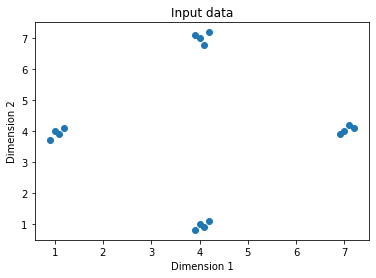

In [17]:
plt.figure()
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Input data")

In [18]:
# Minimum and maximum values for each dimension
dim1_min, dim1_max = data[:,0].min(), data[:,0].max()
dim2_min, dim2_max = data[:,1].min(), data[:,1].max()

In [19]:
# Define the number of neurons in the output layer
num_output = labels.shape[1]

In [20]:
# Define a single-layer neural network
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
nn = nl.net.newp([dim1, dim2], num_output)

In [21]:
# Train the neural network
error_progress = nn.train(data, labels, epochs=100, show=20, lr=0.03)

Epoch: 20; Error: 4.0;
Epoch: 40; Error: 4.0;
Epoch: 60; Error: 4.0;
Epoch: 80; Error: 4.0;
Epoch: 100; Error: 4.0;
The maximum number of train epochs is reached


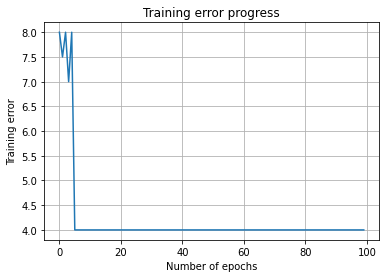

In [22]:
# Plot the training progress
plt.figure()
plt.plot(error_progress)
plt.xlabel("Number of epochs")
plt.ylabel("Training error")
plt.title("Training error progress")
plt.grid()
plt.show()

In [23]:
# Run the classifier on test datapoints
print("Test results:")
data_test = [[0.4, 4.3], [4.4, 0.6], [4.7, 8.1]]
for item in data_test:
    print(item, "-->", nn.sim([item])[0])

Test results:
[0.4, 4.3] --> [0. 0.]
[4.4, 0.6] --> [1. 0.]
[4.7, 8.1] --> [1. 1.]


## Constructing a multilayer neural network
Using neural network as regressor instead of classifier as above

In [24]:
# Generate some training data based on y = 3.x^2 + 5 
# and normalize the points
min_val = -15
max_val = 15
num_points = 130
x = np.linspace(min_val, max_val, num_points)
y = 3 * np.square(x) + 5
y /= np.linalg.norm(y)

In [25]:
# Create data and labels
data = x.reshape(num_points, 1)
labels = y.reshape(num_points, 1)

In [26]:
data[:5]

array([[-15.        ],
       [-14.76744186],
       [-14.53488372],
       [-14.30232558],
       [-14.06976744]])

In [27]:
labels[:5]

array([[0.19221203],
       [0.18634166],
       [0.18056301],
       [0.17487608],
       [0.16928088]])

Text(0.5, 1.0, 'Input data')

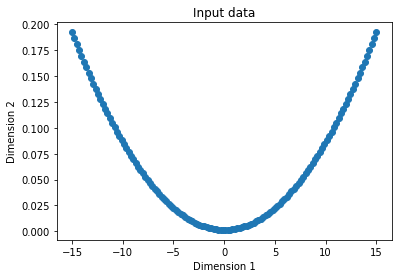

In [28]:
# Plot input data
plt.figure()
plt.scatter(data, labels)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Input data")

In [29]:
# Define a multilayer neural network with 2 hidden layers;
# First hidden layer consists of 10 neurons
# Second hidden layer consists of 6 neurons
# Output layer consists of 1 neuron
nn = nl.net.newff([[min_val, max_val]], [10, 6, 1])

In [30]:
# Set the training algorithm to gradient descent
nn.trainf = nl.train.train_gd

In [31]:
# Train the neural network
error_progress = nn.train(data, labels, epochs=2000, show=100, goal=0.01)

Epoch: 100; Error: 3.457393083572612;
Epoch: 200; Error: 0.922375701065575;
Epoch: 300; Error: 0.2297230946737639;
Epoch: 400; Error: 0.04267088591500936;
Epoch: 500; Error: 0.03176453400817294;
Epoch: 600; Error: 0.07149389106891502;
Epoch: 700; Error: 0.05055047924271102;
Epoch: 800; Error: 0.02796818166558637;
Epoch: 900; Error: 0.03260537368559567;
Epoch: 1000; Error: 0.03679651521586041;
Epoch: 1100; Error: 0.02327687418787003;
Epoch: 1200; Error: 0.01757570600942046;
Epoch: 1300; Error: 0.017918850037051216;
Epoch: 1400; Error: 0.019204468906492817;
Epoch: 1500; Error: 0.01678646025594127;
Epoch: 1600; Error: 0.013436440975422428;
Epoch: 1700; Error: 0.011774086185660596;
Epoch: 1800; Error: 0.011583348971732669;
Epoch: 1900; Error: 0.012178971157143866;
Epoch: 2000; Error: 0.012539889375459336;
The maximum number of train epochs is reached


In [32]:
# Run the neural network on training datapoints
output = nn.sim(data)
y_pred = output.reshape(num_points)

In [33]:
output[:5]

array([[0.16460082],
       [0.16459788],
       [0.1645643 ],
       [0.16449051],
       [0.16435924]])

Text(0.5, 1.0, 'Training error progress')

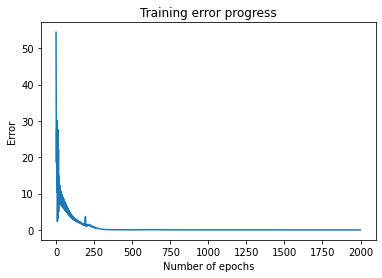

In [34]:
# Plot training error
plt.figure()
plt.plot(error_progress)
plt.xlabel("Number of epochs")
plt.ylabel("Error")
plt.title("Training error progress")

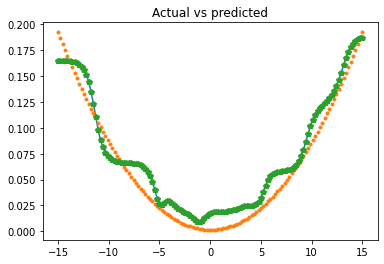

In [35]:
# Plot the output
x_dense = np.linspace(min_val, max_val, num_points * 2)
y_dense_pred = nn.sim(x_dense.reshape(x_dense.size,1)).reshape(x_dense.size)
plt.figure()
plt.plot(x_dense, y_dense_pred, "-", x, y, ".", x, y_pred, "p")
plt.title("Actual vs predicted")
plt.show()

## Building a vector quantizer

In [36]:
text = np.loadtxt("data_vector_quantization.txt")

In [37]:
data = text[:, 0:2]
labels = text[:, 2:]

In [38]:
data[:5]

array([[0.9, 5.1],
       [1.2, 4.8],
       [1. , 4.9],
       [0.8, 5.2],
       [8. , 4.1]])

In [39]:
labels[:5]

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [40]:
num_input_neurons = 10
num_output_neurons = 4
weights = [1/num_output_neurons] * num_output_neurons
nn = nl.net.newlvq(nl.tool.minmax(data), num_input_neurons, weights)

In [41]:
# Train the neural network
_ = nn.train(data, labels, epochs=500, goal=-1)

Epoch: 100; Error: 0.0;
Epoch: 200; Error: 0.0;
Epoch: 300; Error: 0.0;
Epoch: 400; Error: 0.0;
Epoch: 500; Error: 0.0;
The maximum number of train epochs is reached


In [44]:
# Create the input grid
xx, yy = np.meshgrid(np.arange(0, 10, 0.2), np.arange(0, 10, 0.2))
xx.shape = xx.size, 1
yy.shape = yy.size, 1
grid_xy = np.concatenate((xx, yy), axis=1)

In [47]:
# Evaluate the input grid of points
grid_eval = nn.sim(grid_xy)

In [48]:
# Define the 4 classes
class_1 = data[labels[:,0] == 1]
class_2 = data[labels[:,1] == 1]
class_3 = data[labels[:,2] == 1]
class_4 = data[labels[:,3] == 1]

In [50]:
# Define X-Y grids for all the 4 classes
grid_1 = grid_xy[grid_eval[:,0] == 1]
grid_2 = grid_xy[grid_eval[:,1] == 1]
grid_3 = grid_xy[grid_eval[:,2] == 1]
grid_4 = grid_xy[grid_eval[:,3] == 1]

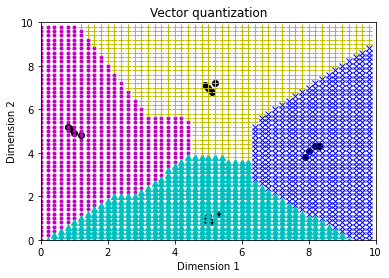

In [51]:
# Plot the outputs
plt.plot(class_1[:,0], class_1[:,1], "ko",
        class_2[:,0], class_2[:,1], "ko",
        class_3[:,0], class_3[:,1], "ko",
        class_4[:,0], class_4[:,1], "ko")
plt.plot(grid_1[:,0], grid_1[:,1], "m.",
        grid_2[:,0], grid_2[:,1], "bx",
        grid_3[:,0], grid_3[:,1], "c^",
        grid_4[:,0], grid_4[:,1], "y+")
plt.axis([0, 10, 0, 10])
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Vector quantization")
plt.show()

## Analyzing sequential data using recurrent neural networks

Particularly RNNs are great for sequential data

In [52]:
def get_data(num_points):
    # Create sine waveforms
    wave_1 = 0.5 * np.sin(np.arange(0, num_points))
    wave_2 = 3.6 * np.sin(np.arange(0, num_points))
    wave_3 = 1.1 * np.sin(np.arange(0, num_points))
    wave_4 = 4.7 * np.sin(np.arange(0, num_points))
    
     # Create varying amplitudes
    amp_1 = np.ones(num_points)
    amp_2 = 2.1 + np.zeros(num_points)
    amp_3 = 3.2 * np.ones(num_points)
    amp_4 = 0.8 + np.zeros(num_points)
    
    wave = np.array([wave_1, wave_2, wave_3, wave_4]).reshape(num_points * 4, 1)
    amp = np.array([[amp_1, amp_2, amp_3, amp_4]]).reshape(num_points * 4, 1)
    
    return wave, amp

In [53]:
# Visualize the output
def visualize_output(nn, num_points_test):
    wave, amp = get_data(num_points_test)
    output = nn.sim(wave)
    plt.plot(amp.reshape(num_points_test * 4))
    plt.plot(output.reshape(num_points_test * 4))

In [54]:
# Create some sample data
num_points = 40
wave, amp = get_data(num_points)

In [55]:
# Create a recurrent neural network with 2 layers
nn = nl.net.newelm([[-2, 2]], [10, 1], [nl.trans.TanSig(), nl.trans.PureLin()])

In [56]:
# Set the init functions for each layer
nn.layers[0].initf = nl.init.InitRand([-0.1, 0.1], "wb")
nn.layers[1].initf = nl.init.InitRand([-0.1, 0.1], "wb")
nn.init()

In [57]:
# Train the recurrent neural network
error_progress = nn.train(wave, amp, epochs=1200, show=100, goal=0.01)

Epoch: 100; Error: 0.8168513270772937;
Epoch: 200; Error: 0.6514590702987281;
Epoch: 300; Error: 0.23002863802548323;
Epoch: 400; Error: 0.07446629084622416;
Epoch: 500; Error: 0.05905017255203433;
Epoch: 600; Error: 0.0501375962658119;
Epoch: 700; Error: 0.04491148086379688;
Epoch: 800; Error: 0.038847946313115035;
Epoch: 900; Error: 0.034284861346778925;
Epoch: 1000; Error: 0.029934109096375294;
Epoch: 1100; Error: 0.027691338998221664;
Epoch: 1200; Error: 0.026901925291820245;
The maximum number of train epochs is reached


In [58]:
# Run the training data through the network
output = nn.sim(wave)

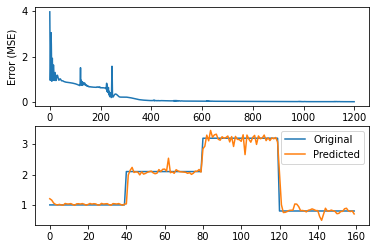

In [59]:
# Plot the results
plt.subplot(211)
plt.plot(error_progress)
plt.xlabel("Number of epochs")
plt.ylabel("Error (MSE)")
plt.subplot(212)
plt.plot(amp.reshape(num_points * 4))
plt.plot(output.reshape(num_points * 4))
plt.legend(["Original", "Predicted"])

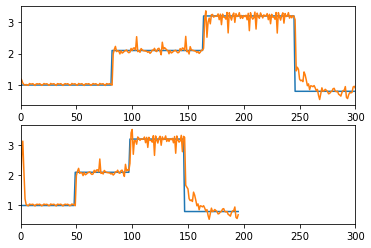

In [60]:
# Testing the network performance on unknown data
plt.figure()
plt.subplot(211)
visualize_output(nn, 82)
plt.xlim([0, 300])
plt.subplot(212)
visualize_output(nn, 49)
plt.xlim([0, 300])
plt.show()

## Visualizing characters in an Optical Character Recognition Database

In [66]:
import cv2

In [67]:
# Define the input file 
input_file = "letter.data"

# Define the visualization parameters 
img_resize_factor = 12
start = 6
end = -1
height, width = 16, 8

In [68]:
# Iterate until the user presses the Esc key
with open(input_file, "r") as f:
    for line in f.readlines():
        # Read the data
        data = np.array([255 * float(x) for x in line.split("\t")[start:end]])

        # Reshape the data into a 2D image
        img = np.reshape(data, (height, width))

        # Scale the image
        img_scaled = cv2.resize(img, None, fx=img_resize_factor, fy=img_resize_factor)

        # Display the image
        cv2.imshow("Image", img_scaled)

        # Check if the user pressed the Esc key
        c = cv2.waitKey()
        if c == 27:
            break

## Building an Optical Character Recognition engine

In [61]:
input_file = "letter.data"
# Define the number of datapoints to be 
# loaded from the input file
num_datapoints = 50
# String containing all the distinct characters
orig_labels = "omandig"
# Compute the number of distinct characters
num_orig_labels = len(orig_labels)
# Define the training and testing parameters
num_train = int(0.9 * num_datapoints)
num_test = num_datapoints - num_train
# Define the dataset extraction parameters
start = 6
end = -1

# Creating the dataset
data = []
labels = []

with open(input_file, 'r') as f:
    for line in f.readlines():
        # Split the current line tabwise
        list_vals = line.split('\t')
    
        # Check if the label is in our ground truth
        # labels. If not, we should skip it.
        if list_vals[1] not in orig_labels:
            continue

        # Extract the current label and append it
        # to the main list
        label = np.zeros((num_orig_labels, 1))
        label[orig_labels.index(list_vals[1])] = 1
        labels.append(label)
        # Extract the character vector and append it to the main list
        cur_char = np.array([float(x) for x in list_vals[start:end]])
        data.append(cur_char)
        
        if len(data) >= num_datapoints:
            break

# Convert the data and labels to numpy arrays
data = np.asfarray(data)
labels = np.array(labels).reshape(num_datapoints, num_orig_labels)

# Extract the number of dimensions
num_dims = len(data[0])

In [62]:
# Create a feedforward neural network
nn = nl.net.newff([[0, 1] for _ in range(len(data[0]))],
        [128, 16, num_orig_labels])
# Set the training algorithm to gradient descent
nn.trainf = nl.train.train_gd

In [63]:
# Train the network
error_progress = nn.train(data[:num_train,:], labels[:num_train,:], epochs=10000, show=100, goal=0.01)

Epoch: 100; Error: 85.74015854922652;
Epoch: 200; Error: 45.76051058492817;
Epoch: 300; Error: 13.256443388045552;
Epoch: 400; Error: 12.683195006456842;
Epoch: 500; Error: 12.862178028954078;
Epoch: 600; Error: 8.826964221423053;
Epoch: 700; Error: 9.331655763980443;
Epoch: 800; Error: 7.804243268011636;
Epoch: 900; Error: 8.52512647180768;
Epoch: 1000; Error: 1.4668035964672543;
Epoch: 1100; Error: 0.4602123374836824;
Epoch: 1200; Error: 0.34940403107443363;
Epoch: 1300; Error: 0.3769993561192386;
Epoch: 1400; Error: 0.29986154042251667;
Epoch: 1500; Error: 0.22645245538590028;
Epoch: 1600; Error: 0.43935965160593965;
Epoch: 1700; Error: 0.37272675550251577;
Epoch: 1800; Error: 0.32330584976970633;
Epoch: 1900; Error: 0.30380820750367793;
Epoch: 2000; Error: 0.29220099164260144;
Epoch: 2100; Error: 0.28297164688366055;
Epoch: 2200; Error: 0.2745353773365725;
Epoch: 2300; Error: 0.2663455169122373;
Epoch: 2400; Error: 0.25818141848202447;
Epoch: 2500; Error: 0.24995809577826703;
Epoch

In [64]:
# Predict the output for test inputs
print('\nTesting on unknown data:')
predicted_test = nn.sim(data[num_train:, :])
for i in range(num_test):
    print('\nOriginal:', orig_labels[np.argmax(labels[i])])
    print('Predicted:', orig_labels[np.argmax(predicted_test[i])])


Testing on unknown data:

Original: o
Predicted: o

Original: m
Predicted: n

Original: m
Predicted: n

Original: a
Predicted: o

Original: n
Predicted: n
